In [ ]:
import gym
import numpy as np
import random

env = gym.make("FrozenLake-v0", map_name='4x4', is_slippery=False)

Funkcja generująca politykę stochastyczną:

In [ ]:
def create_random_sto_policy(env):
    policy = {}
    for key in range(0, env.observation_space.n):
        p = {}
        for action in range(0, env.action_space.n):
            p[action] = 1 / env.action_space.n
        policy[key] = p
    return policy

Testujemy:

In [ ]:
policy = create_random_sto_policy(env)
policy

{0: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 1: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 2: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 3: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 4: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 5: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 6: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 7: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 8: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 9: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 10: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 11: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 12: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 13: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 14: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 15: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}}

Funkcja generująca epizod:

In [ ]:
def generate_episode(env, policy):
    env.reset()
    episode = []
    finished = False

    while not finished:
        s = env.s  

        timestep = []
        timestep.append(s)
        
        n = random.uniform(0, sum(policy[s].values()))
        
        top_range = 0
        for prob in policy[s].items():
            top_range += prob[1]
            if n < top_range:
                action = prob[0]
                break
        
        #observation, reward, done, info
        _, reward, finished, _ = env.step(action)
        
        timestep.append(action)
        timestep.append(reward)

        episode.append(timestep)
        
    return episode

Testujemy:

In [ ]:
print("LEFT = 0 DOWN = 1 RIGHT = 2 UP = 3")
for i in range(100):
  print("Epizod ",i,": ",generate_episode(env, policy))

LEFT = 0 DOWN = 1 RIGHT = 2 UP = 3
Epizod  0 :  [[0, 0, 0.0], [0, 0, 0.0], [0, 1, 0.0], [4, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 0, 0.0], [0, 3, 0.0], [0, 2, 0.0], [1, 3, 0.0], [1, 0, 0.0], [0, 1, 0.0], [4, 3, 0.0], [0, 0, 0.0], [0, 2, 0.0], [1, 1, 0.0]]
Epizod  1 :  [[0, 0, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 0, 0.0], [0, 1, 0.0], [4, 0, 0.0], [4, 0, 0.0], [4, 2, 0.0]]
Epizod  2 :  [[0, 0, 0.0], [0, 1, 0.0], [4, 1, 0.0], [8, 3, 0.0], [4, 2, 0.0]]
Epizod  3 :  [[0, 0, 0.0], [0, 1, 0.0], [4, 2, 0.0]]
Epizod  4 :  [[0, 2, 0.0], [1, 2, 0.0], [2, 1, 0.0], [6, 3, 0.0], [2, 1, 0.0], [6, 3, 0.0], [2, 1, 0.0], [6, 3, 0.0], [2, 2, 0.0], [3, 2, 0.0], [3, 2, 0.0], [3, 3, 0.0], [3, 1, 0.0]]
Epizod  5 :  [[0, 2, 0.0], [1, 1, 0.0]]
Epizod  6 :  [[0, 2, 0.0], [1, 3, 0.0], [1, 2, 0.0], [2, 0, 0.0], [1, 2, 0.0], [2, 2, 0.0], [3, 2, 0.0], [3, 2, 0.0], [3, 1, 0.0]]
Epizod  7 :  [[0, 0, 0.0], [0, 1, 0.0], [4, 1, 0.0], [8, 3, 0.0], [4, 2, 0.0]]
Epizod  8 :  [[0, 3, 0.0], [0, 1, 0.0], [4, 1, 0.0], [8, 3, 

**Przeglądanie epizodu od końca**

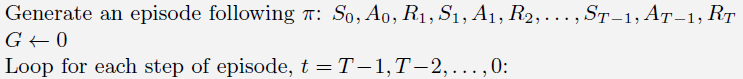

In [ ]:
policy = create_random_sto_policy(env)   
episode = generate_episode(env, policy) 
print(episode)

for i in reversed(range(0, len(episode))):
    S_t, A_t, R_t = episode[i]
    print(S_t," ",A_t," ",R_t)

[[0, 2, 0.0], [1, 0, 0.0], [0, 0, 0.0], [0, 2, 0.0], [1, 2, 0.0], [2, 3, 0.0], [2, 3, 0.0], [2, 3, 0.0], [2, 0, 0.0], [1, 0, 0.0], [0, 3, 0.0], [0, 1, 0.0], [4, 0, 0.0], [4, 3, 0.0], [0, 3, 0.0], [0, 2, 0.0], [1, 2, 0.0], [2, 3, 0.0], [2, 2, 0.0], [3, 0, 0.0], [2, 0, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 2, 0.0], [2, 1, 0.0], [6, 3, 0.0], [2, 3, 0.0], [2, 0, 0.0], [1, 1, 0.0]]
1   1   0.0
2   0   0.0
2   3   0.0
6   3   0.0
2   1   0.0
1   2   0.0
0   2   0.0
1   0   0.0
2   0   0.0
3   0   0.0
2   2   0.0
2   3   0.0
1   2   0.0
0   2   0.0
0   3   0.0
4   3   0.0
4   0   0.0
0   1   0.0
0   3   0.0
1   0   0.0
2   0   0.0
2   3   0.0
2   3   0.0
2   3   0.0
1   2   0.0
0   2   0.0
0   0   0.0
1   0   0.0
0   2   0.0


**Czy pierwsza wizyta w danym stanie?**

image.png

In [ ]:
policy = create_random_sto_policy(env)   
episode = generate_episode(env, policy) 
print(episode)

for time_step in reversed(range(0, len(episode))):

  state = episode[time_step][0]

  if not state in [x[0] for x in episode[0:time_step]]:
    print("t=",time_step," pierwsza wizyta w stanie: ",state)

[[0, 1, 0.0], [4, 1, 0.0], [8, 1, 0.0]]
t= 2  pierwsza wizyta w stanie:  8
t= 1  pierwsza wizyta w stanie:  4
t= 0  pierwsza wizyta w stanie:  0


Słowniki (https://oprojektowaniu.pl/python-dla-inzynierow-slowniki/)

In [ ]:
moj_slownik = {'klucz1': 'wartosc1', 'klucz2': 'wartosc2'}

\**Słownik, którego kluczami są stany S, a wartościami listy zwrotów G**

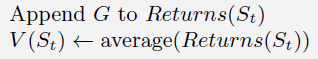

In [ ]:
Returns = {3:[4,5,-1],1:[2,3,6,7,1],6:[2,-1,3,1]} 

In [ ]:
Returns = {}

Returns[2]=[3]
print(Returns)

Returns[2].append(4)
print(Returns)

Returns[2].append(8)
print(Returns)

{2: [3]}
{2: [3, 4]}
{2: [3, 4, 8]}


In [ ]:
Returns[5]=[7]
print(Returns)

Returns[5].append(-4)
print(Returns)

Returns[5].append(2)
print(Returns)

{2: [3, 4, 8], 5: [7]}
{2: [3, 4, 8], 5: [7, -4]}
{2: [3, 4, 8], 5: [7, -4, 2]}


Sprawdzenie czy dany klucz istnieje w słowniku:

In [ ]:
state = 2
if state in Returns.keys():
    print("Stan był już odwiedzony!")    
else:
    print("Stan nie był jeszcze odwiedzony!")

Stan był już odwiedzony!


Policzenie **średniej zwrotów** dla pewnego stanu

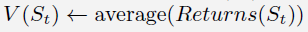

In [ ]:
np.mean(Returns[2])

5.0

In [ ]:
V = np.zeros(env.nS)
Returns = {}
for u in range(10000):
  y=1
  policy = create_random_sto_policy(env)   
  episode = generate_episode(env, policy) 
  #print(episode)
  G = 0

  for p in reversed(range(0, len(episode))):
    state, A_t, R = episode[p]
    #print(S_t," ",A_t," ",R_t)
    G = y*G + R
    
  
    if not state in [x[0] for x in episode[0:p]]:
     #print("t=",time_step," pierwsza wizyta w stanie: ",state)
     if not state in Returns.keys():
      Returns[state]=[G]      
     else :
      Returns[state].append(G)    
      V[state] = np.average(Returns[state])
  
     





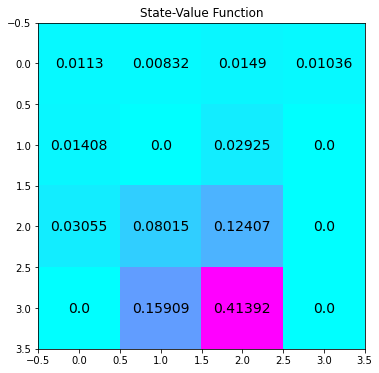

In [ ]:
from plot_utils import plot_values
plot_values(V)